# Dispersion y caida de ceniza. Ecuacion de transporte adveccion-difusion 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers # type: ignore

In [ ]:
# Definir la ecuación de transporte advección-difusión
def advection_diffusion_equation(C, t, x, u, D):
    dc_dt = -u * tf.gradients(C, x)[0] + D * tf.gradients(tf.gradients(C, x)[0], x)[0]
    return dc_dt

In [ ]:
# Condiciones iniciales y de contorno
def initial_condition(x):
    return np.exp(-x**2)

def boundary_condition(t):
    return 0.0

In [ ]:
# Generar datos simulados para entrenamiento
x_train = np.linspace(0, 10, 100)
t_train = np.linspace(0, 5, 50)
u_train = 1.0  # Velocidad del viento
D_train = 0.1  # Coeficiente de difusión

X, T = np.meshgrid(x_train, t_train)
C_init = initial_condition(X)

In [ ]:
# Convertir a Tensorflow
x_train_tf = tf.constant(x_train, dtype=tf.float32)
t_train_tf = tf.constant(t_train, dtype=tf.float32)
u_train_tf = tf.constant(u_train, dtype=tf.float32)
D_train_tf = tf.constant(D_train, dtype=tf.float32)

In [ ]:
# Construir la red neuronal PINN
model = tf.keras.Sequential([
    layers.Dense(20, activation='tanh', input_shape=(2,)),
    layers.Dense(20, activation='tanh'),
    layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\djara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Datos de entrenamiento para la red neuronal
X_train_pinn = np.column_stack([X.flatten(), T.flatten()])
C_train_pinn = C_init.flatten()

# Entrenar la red neuronal
model.fit(X_train_pinn, C_train_pinn, epochs=1000, verbose=0)

In [ ]:
# Generar datos para predicción
x_pred = np.linspace(0, 10, 100)
t_pred = np.linspace(0, 5, 50)
X_pred, T_pred = np.meshgrid(x_pred, t_pred)
X_pred_pinn = np.column_stack([X_pred.flatten(), T_pred.flatten()])

In [ ]:
# Realizar predicciones con la red neuronal entrenada
C_pred = model.predict(X_pred_pinn).reshape(len(t_pred), len(x_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


Text(0, 0.5, 'Tiempo (s)')

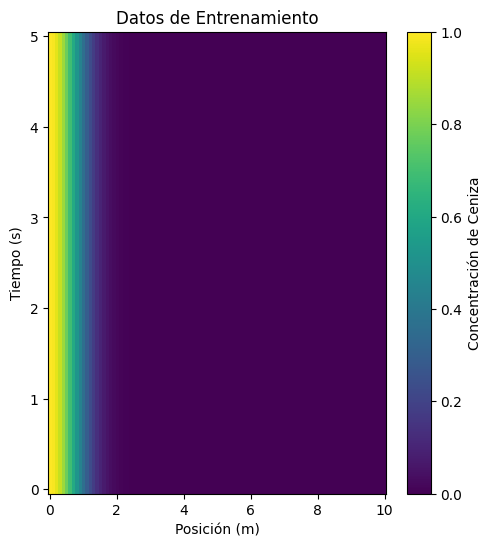

In [13]:
# Visualizar resultados - Figura 1
plt.figure(figsize=(12, 6))

# Gráfico 1: Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(X, T, C_init, shading='auto', cmap='viridis')
plt.colorbar(label='Concentración de Ceniza')
plt.title('Datos de Entrenamiento')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')

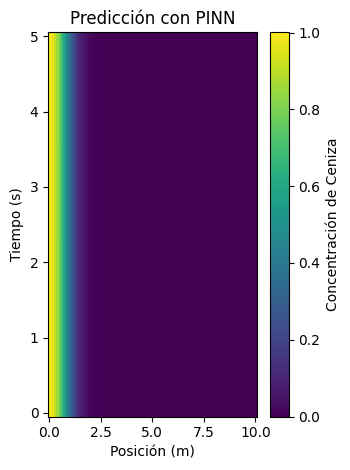

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [14]:
# Gráfico 2: Predicción con PINN
plt.subplot(1, 2, 2)
plt.pcolormesh(X_pred, T_pred, C_pred, shading='auto', cmap='viridis')
plt.colorbar(label='Concentración de Ceniza')
plt.title('Predicción con PINN')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

# Visualizar resultados - Figura 2
plt.figure(figsize=(12, 6))

C:\Users\djara\AppData\Local\Temp\ipykernel_36564\710016063.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ajustar el diseño para evitar superposiciones


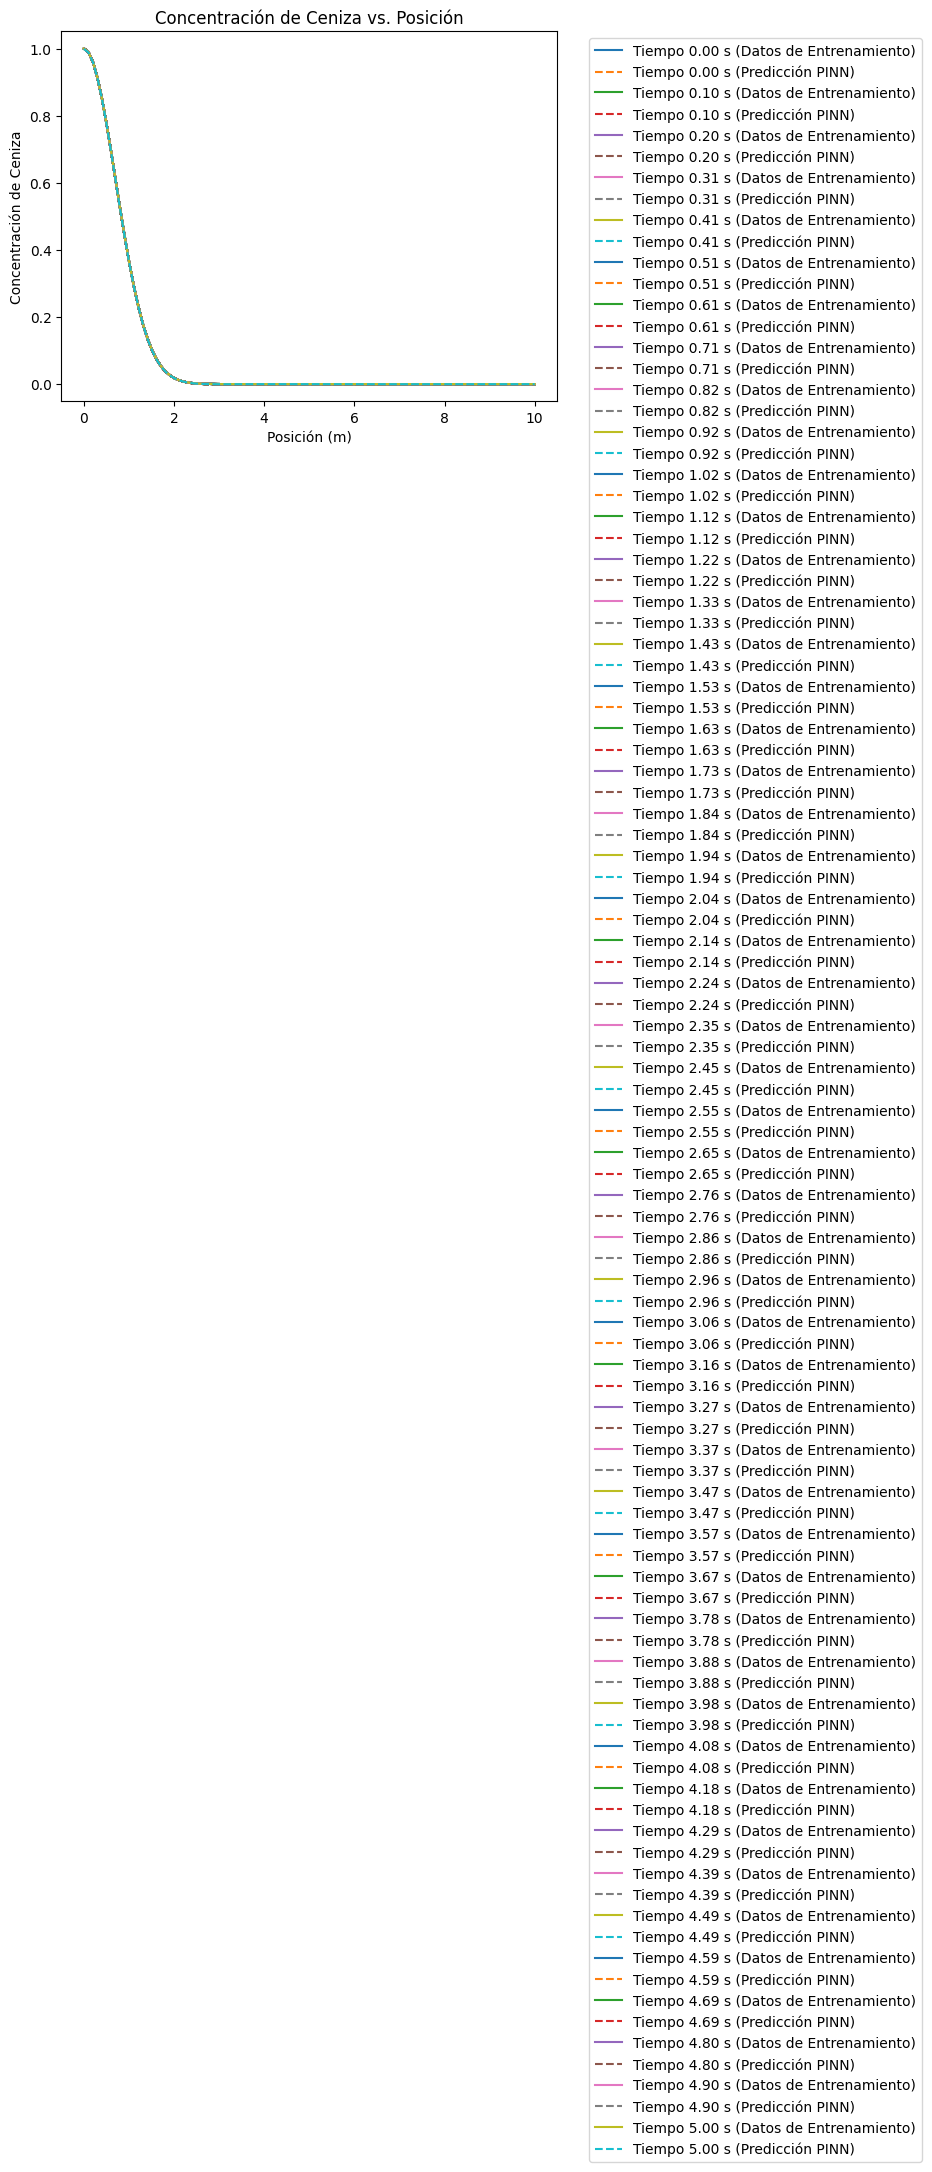

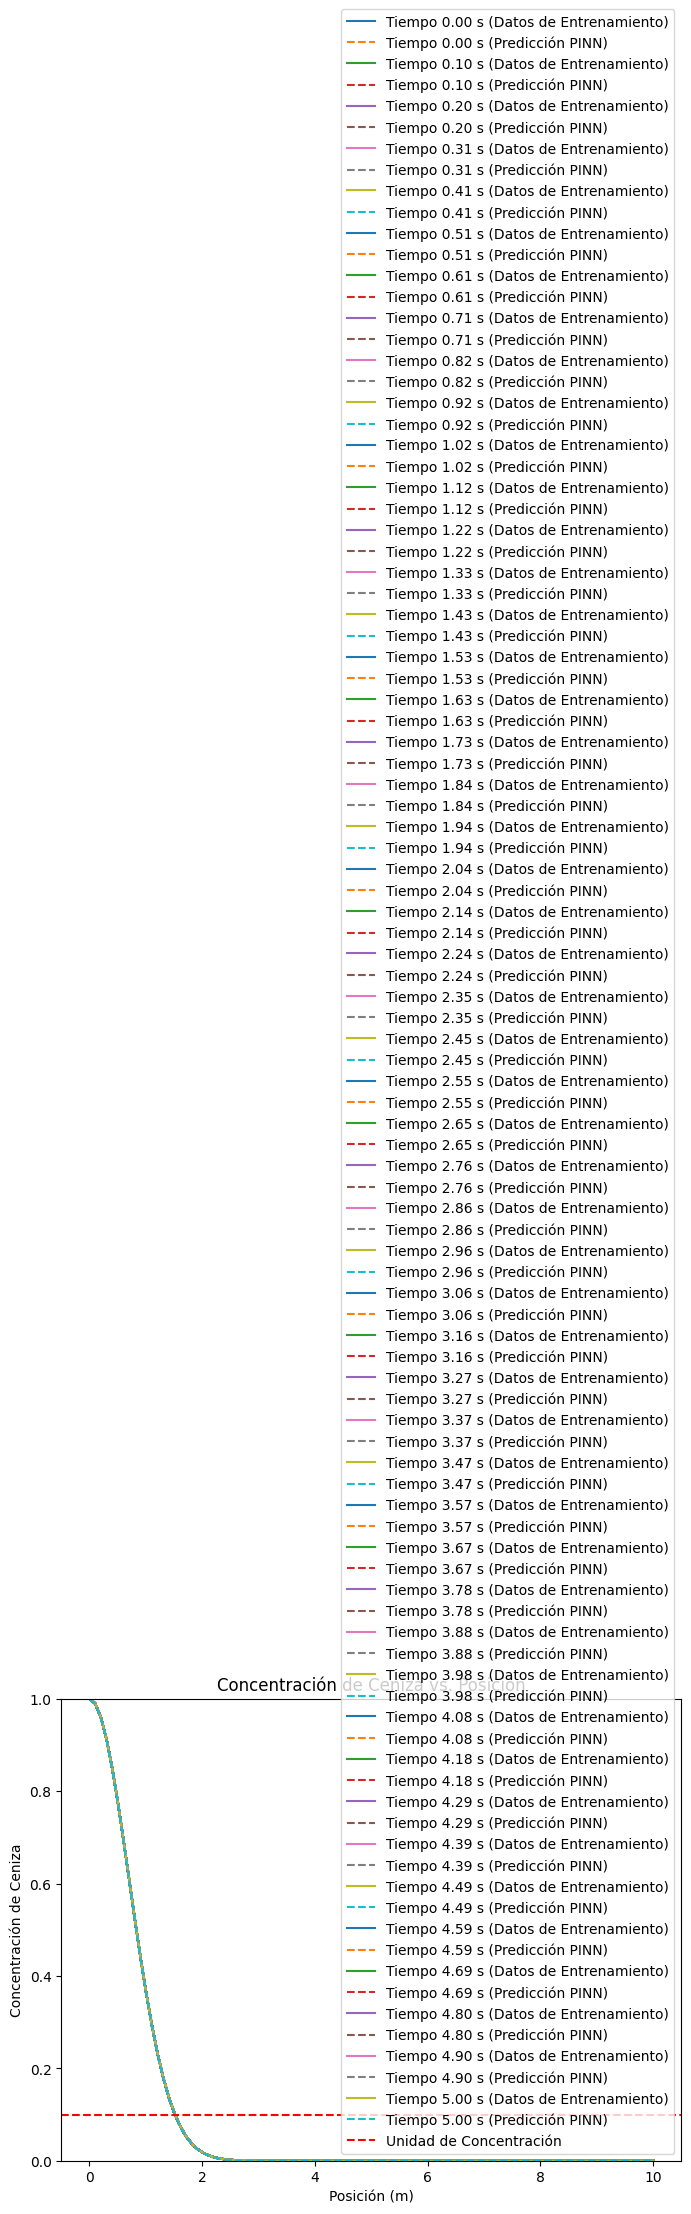

In [15]:
# Gráfico 3: Curvas de concentración versus posición
for i in range(len(t_train)):
    plt.plot(x_train, C_init[i, :], label=f'Tiempo {t_train[i]:.2f} s (Datos de Entrenamiento)')
    plt.plot(x_pred, C_pred[i, :], label=f'Tiempo {t_pred[i]:.2f} s (Predicción PINN)', linestyle='--')

plt.title('Concentración de Ceniza vs. Posición')
plt.xlabel('Posición (m)')
plt.ylabel('Concentración de Ceniza')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico

# Visualizar resultados - Figura 3
plt.figure(figsize=(8, 6))

# Gráfico 4: Curvas de concentración versus posición (en el rango de 0 a 3 metros)
for i in range(len(t_train)):
    plt.plot(x_train, C_init[i, :], label=f'Tiempo {t_train[i]:.2f} s (Datos de Entrenamiento)')
    plt.plot(x_pred, C_pred[i, :], label=f'Tiempo {t_pred[i]:.2f} s (Predicción PINN)', linestyle='--')

plt.title('Concentración de Ceniza vs. Posición')
plt.xlabel('Posición (m)')
plt.ylabel('Concentración de Ceniza')
plt.ylim([0, 1])  # Establecer el rango y para la concentración
plt.axhline(y=0.1, color='r', linestyle='--', label='Unidad de Concentración')  # Línea para destacar la unidad de concentración
plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()